In this notebook, we test the convergence of SparseNet as a function of different learning parameters. This shows the relative robustness of this method according to the coding parameters, but also the importance of homeostasis to obtain an efficient set of filters:

* first, whatever the learning rate, the convergence is not complete without homeostasis,
* second, we achieve better convergence for similar learning rates and on a certain range of learning rates for the homeostasis
* third, the smoothing parameter ``alpha_homeo`` has to be properly set to achieve a good convergence.
* last, this homeostatic rule works with the different variants of sparse coding.

See also :
* http://blog.invibe.net/posts/2017-03-14-reproducing-olshausens-classical-sparsenet.html for a description of how SparseNet is implemented in the scikit-learn package
* http://blog.invibe.net/posts/2017-03-15-reproducing-olshausens-classical-sparsenet-part-2.html for a description of how we managed to implement the homeostasis
* In [an extension](http://blog.invibe.net/posts/2017-05-13-extending-olshausens-classical-sparsenet.html), we will study how homeostasis (cooperation) may be an essential ingredient to this algorithm working on a winner-take-all basis (competition). This extension has been published as Perrinet, Neural Computation (2010) (see  http://invibe.net/LaurentPerrinet/Publications/Perrinet10shl ).

This is joint work with [Victor Boutin](http://invibe.net/LaurentPerrinet/VictorBoutin).

<!-- TEASER_END -->

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(precision=2, suppress=True)

In [2]:
from shl_scripts.shl_experiments import SHL

list_figures = ['show_dico', 'plot_variance',  'plot_variance_histogram',  'time_plot_prob',  'time_plot_kurt',  'time_plot_var']

DEBUG_DOWNSCALE, verbose = 10, 100
DEBUG_DOWNSCALE, verbose = 1, 0
DEBUG_DOWNSCALE, verbose = 10, 10

N_scan = 7
database = 'database/'
database = '../../2017-02-07_UnsupervisedLearning/database'

exp = 'comp_'

shl = SHL(DEBUG_DOWNSCALE=DEBUG_DOWNSCALE, verbose=verbose)
data = shl.get_data()


## 1. With diferent learning rates but without homeostasis

Here,we only ensure the norm ofthe filters is constant.

In [3]:
shl = SHL(DEBUG_DOWNSCALE=DEBUG_DOWNSCALE)
data = shl.get_data()

In [ ]:
for eta in np.logspace(-1, 1, N_scan, base=10)*shl.eta:
    matname = exp + 'no homeo - eta={}'.format(eta)
    shl = SHL(DEBUG_DOWNSCALE=DEBUG_DOWNSCALE, eta_homeo=0, eta=eta, verbose=verbose)
    dico = shl.learn_dico(data=data, matname=matname, list_figures=list_figures)    

## 2. Homeostasis à-la-SparseNet

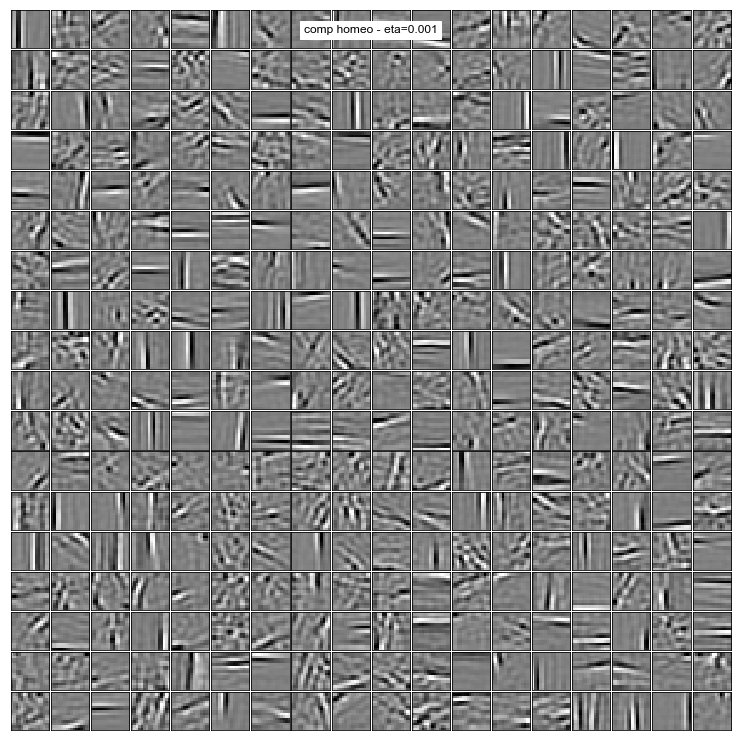

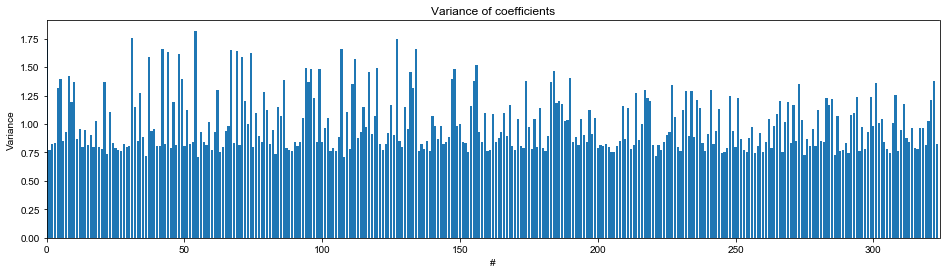

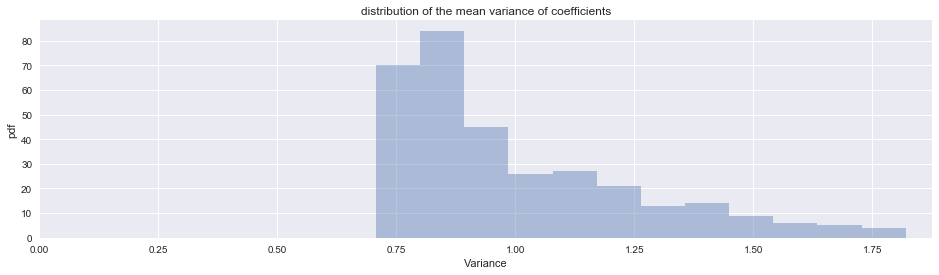

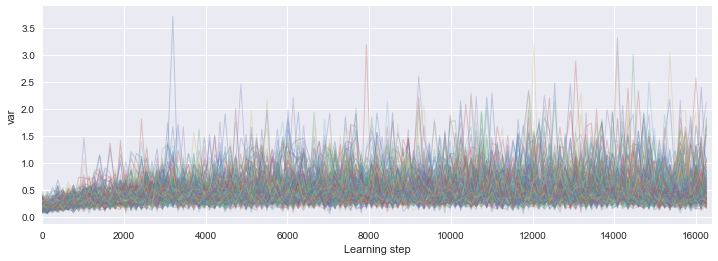

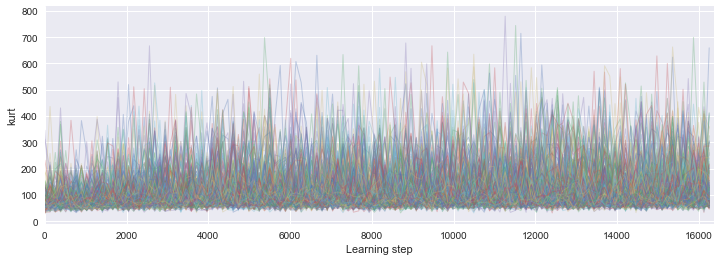

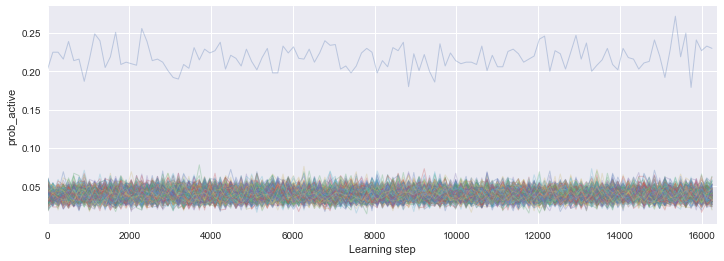

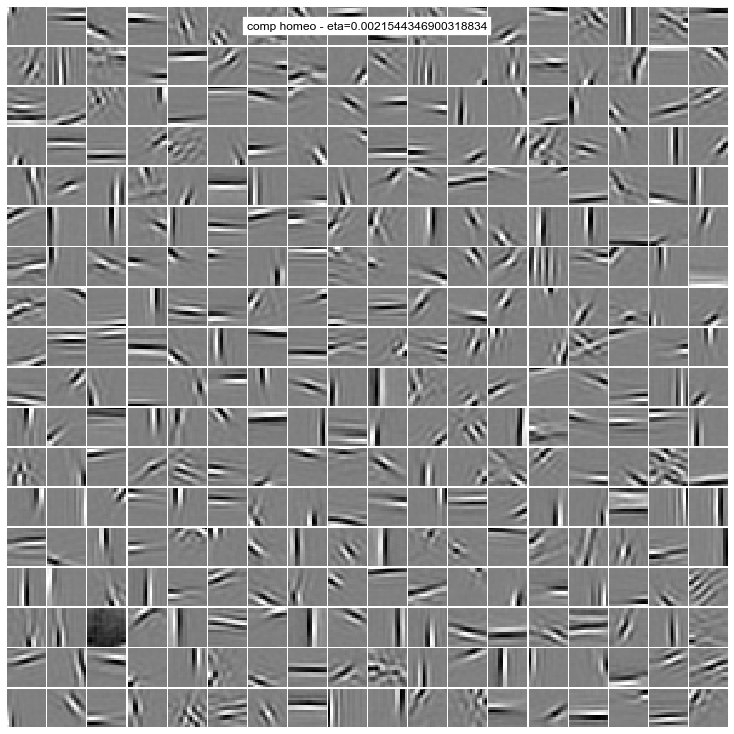

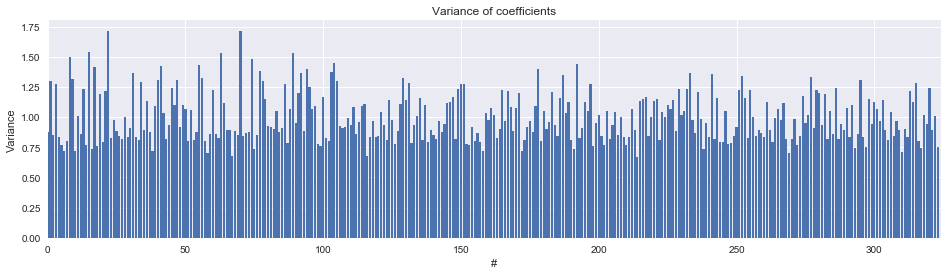

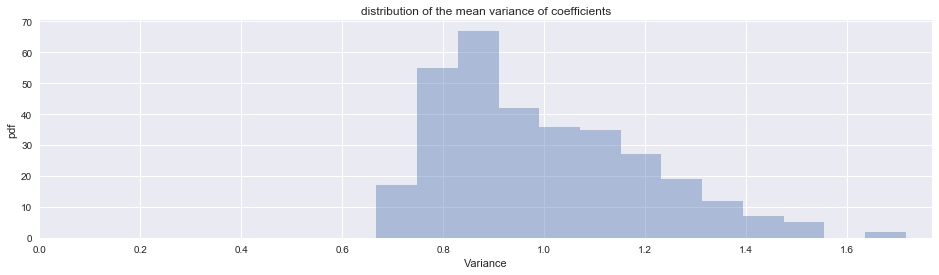

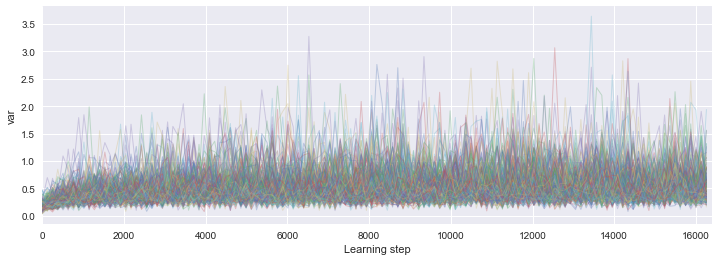

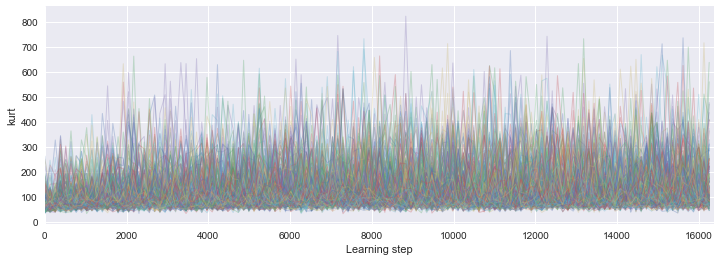

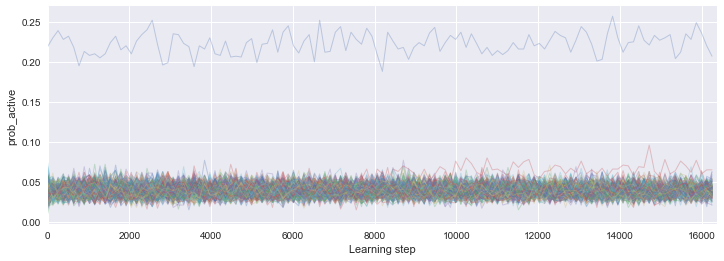

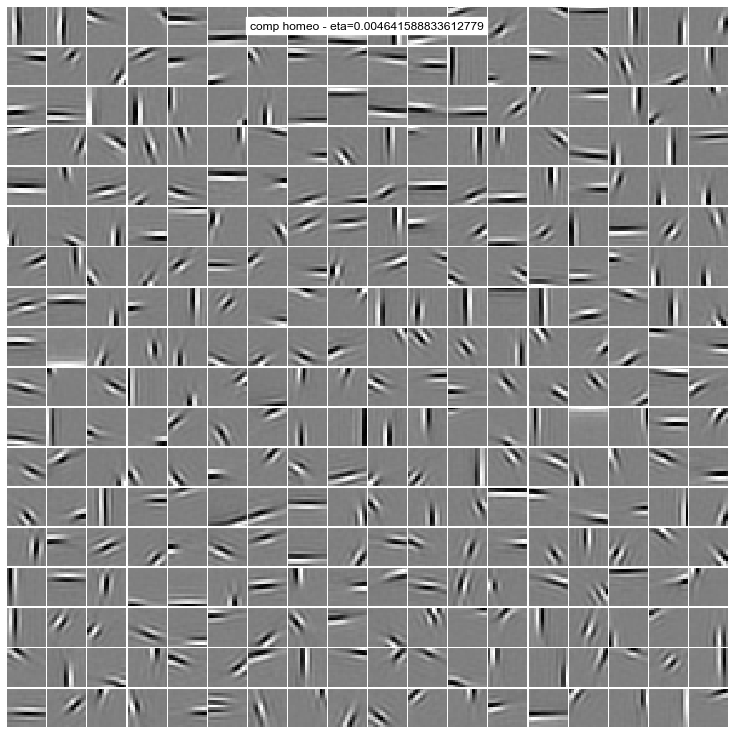

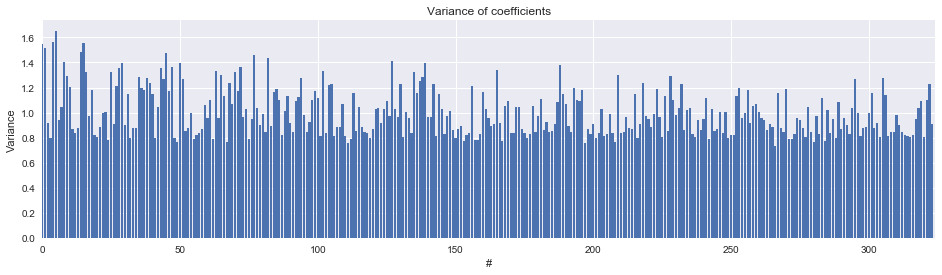

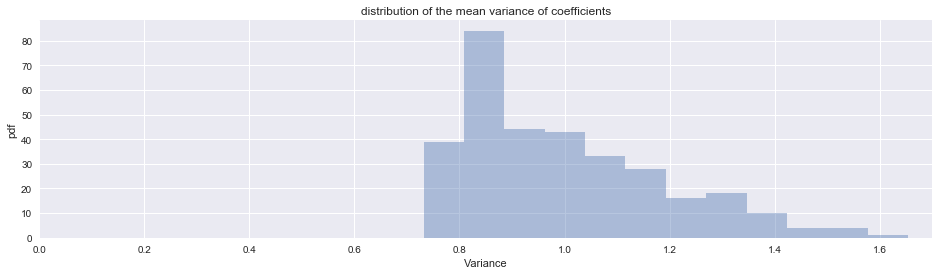

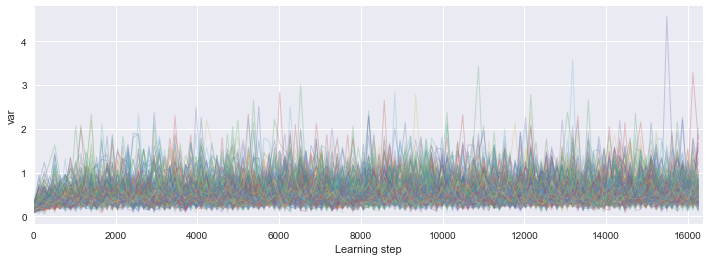

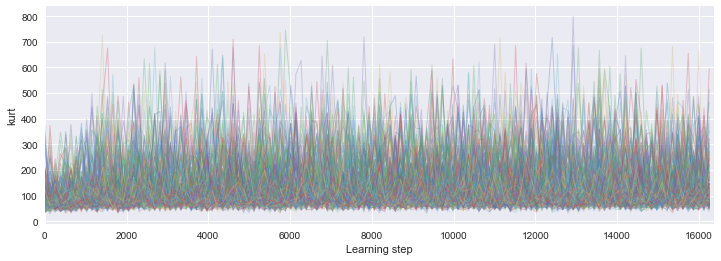

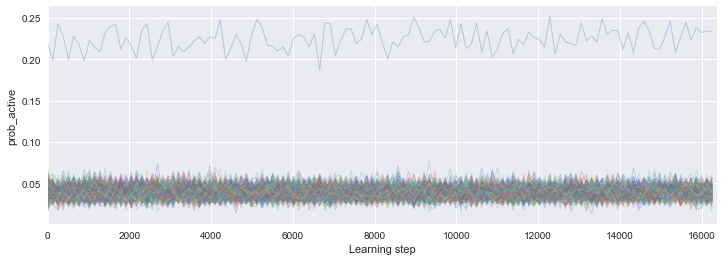

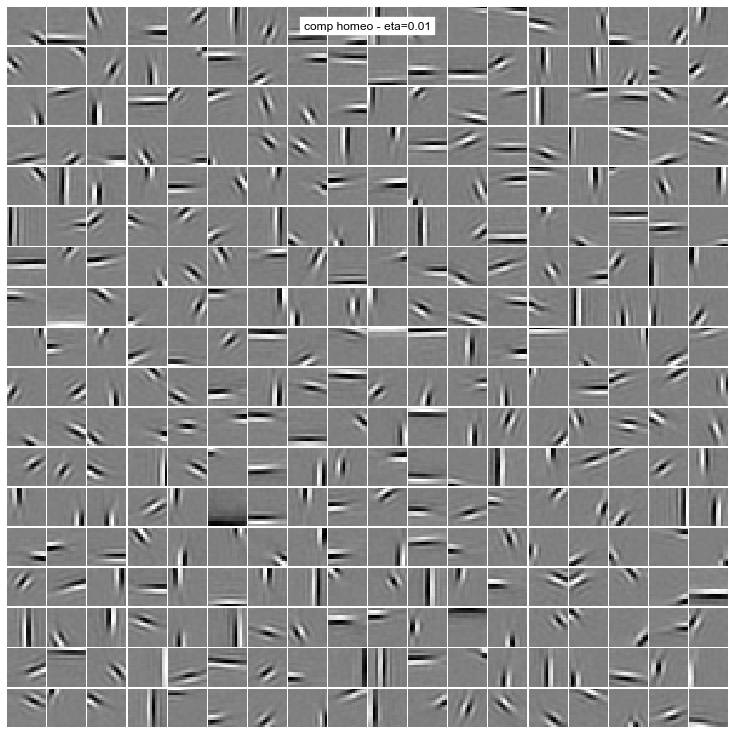

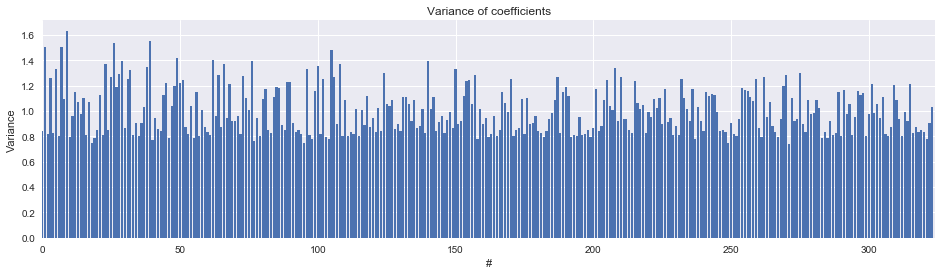

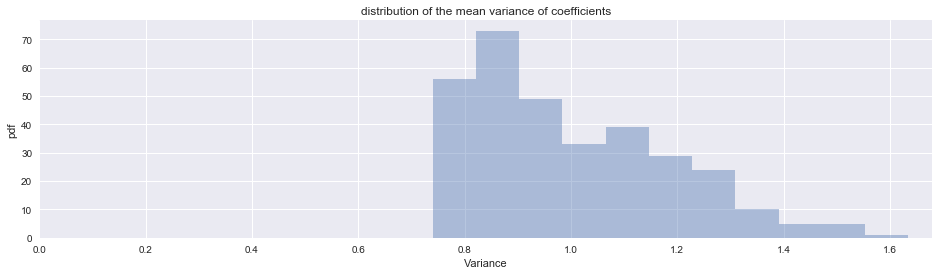

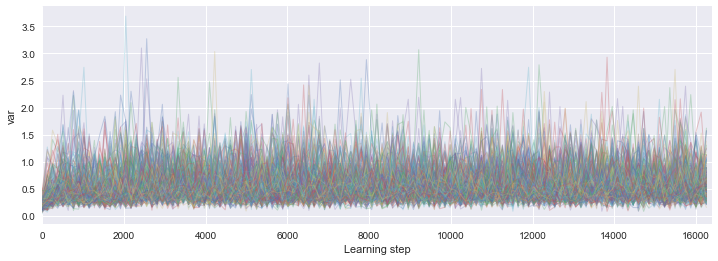

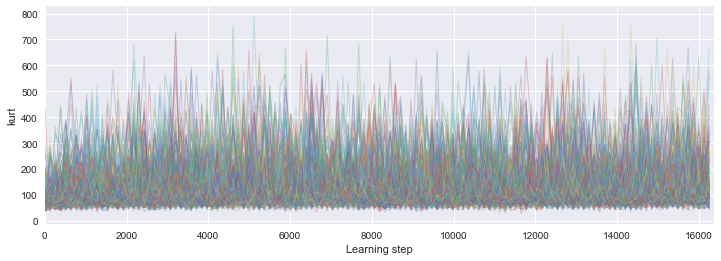

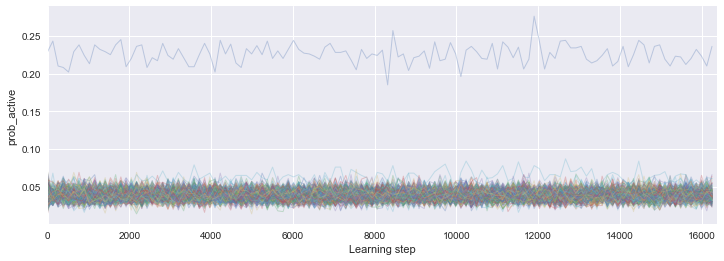

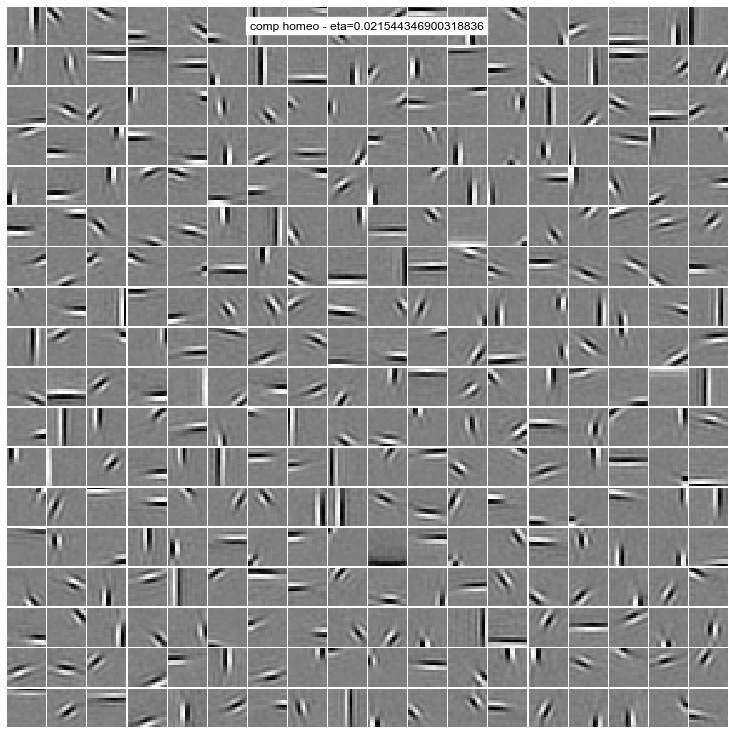

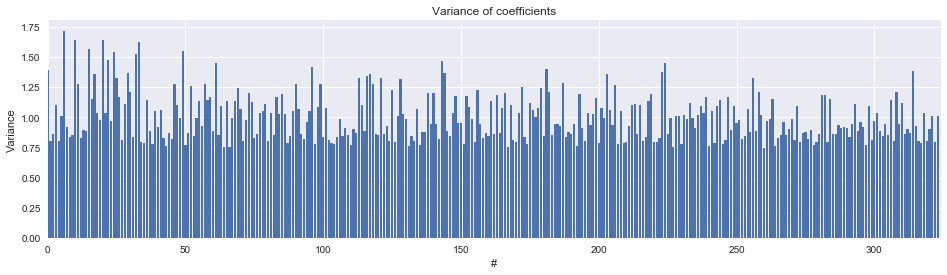

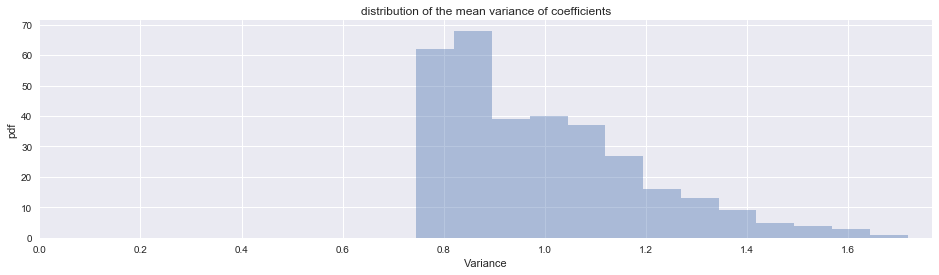

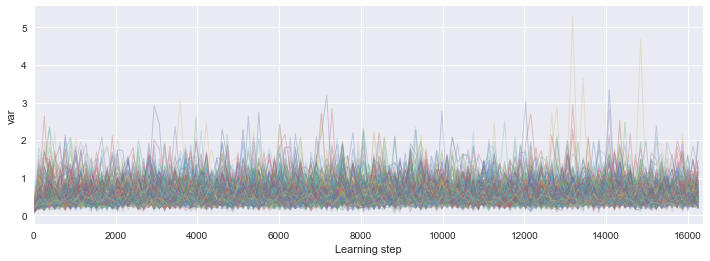

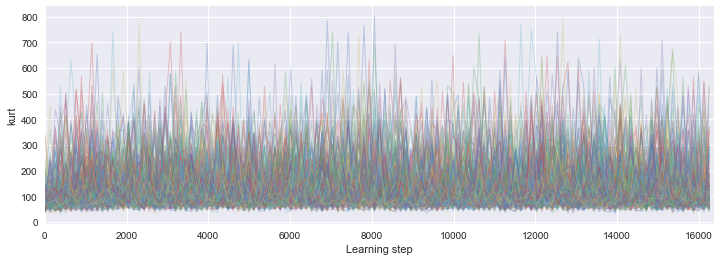

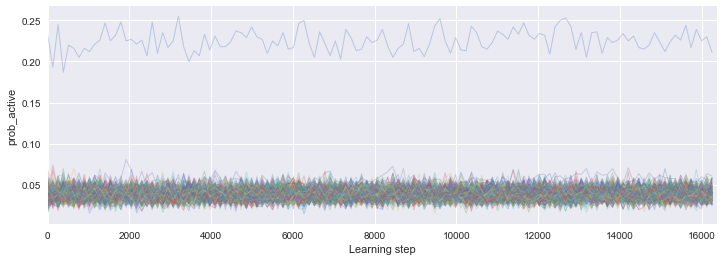

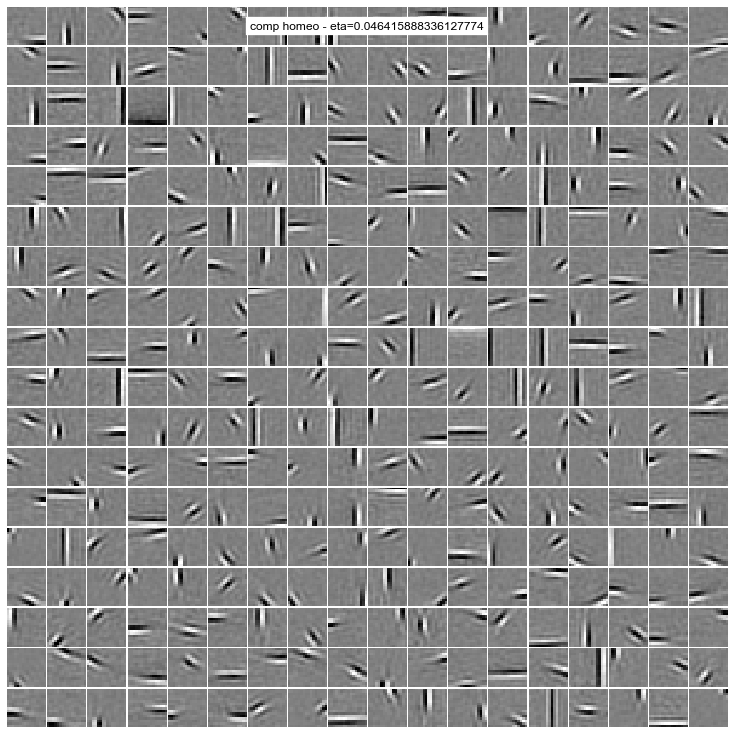

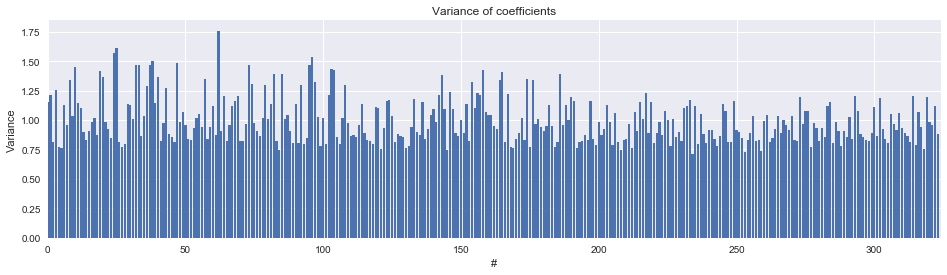

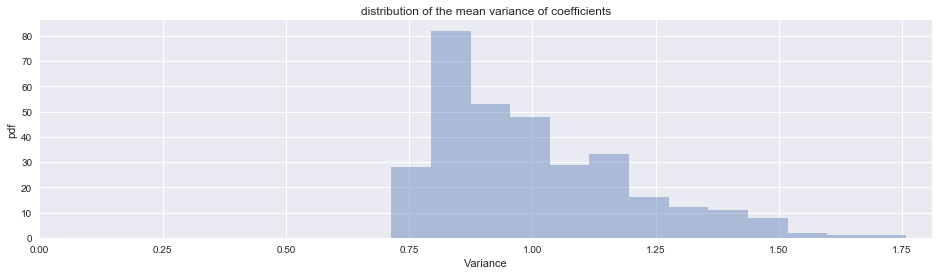

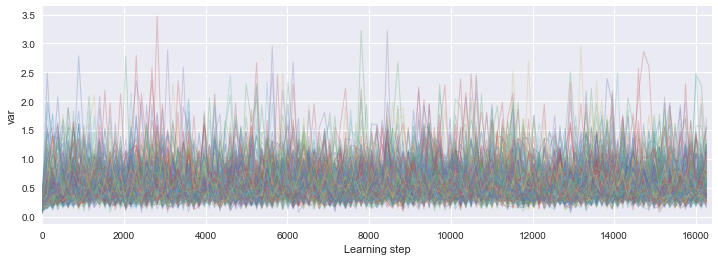

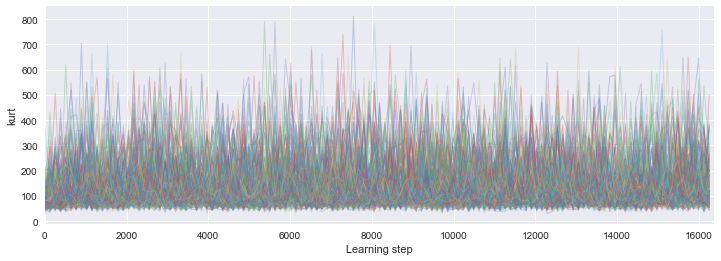

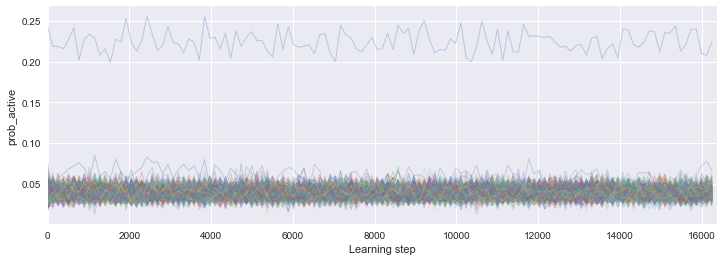

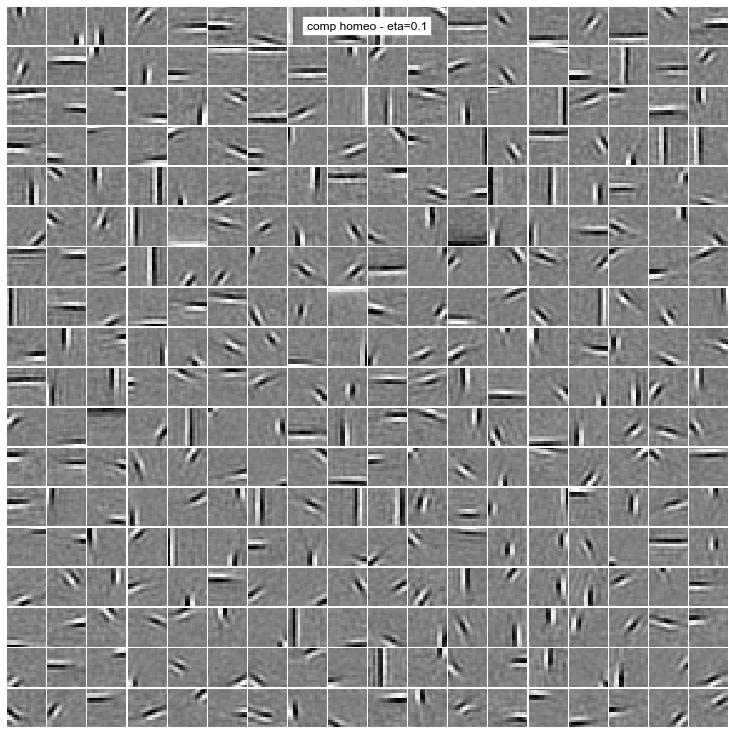

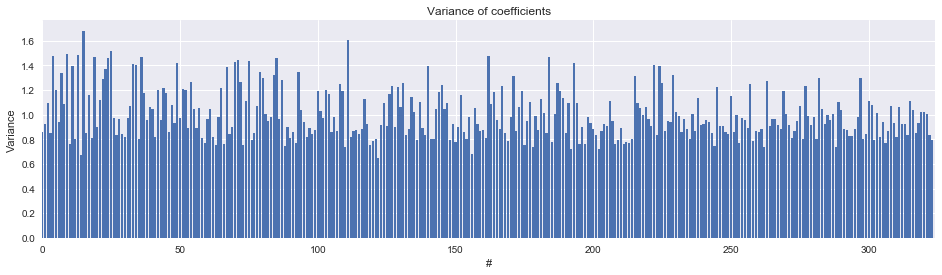

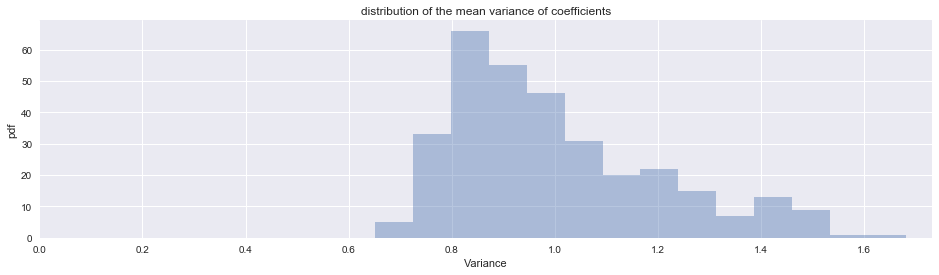

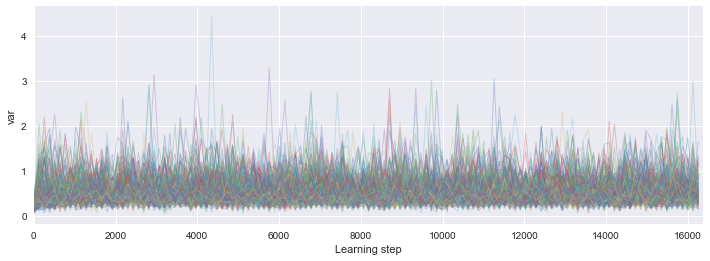

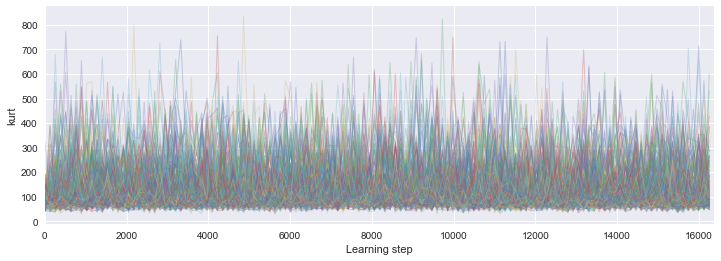

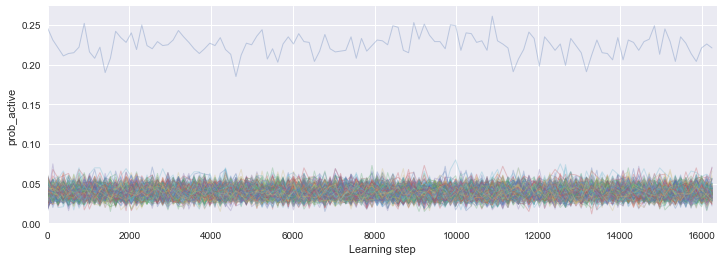

In [4]:
shl = SHL()
data = shl.get_data()
for eta in np.logspace(-1, 1, N_scan, base=10)*shl.eta:
    matname = exp + 'homeo - eta={}'.format(eta)
    shl = SHL(DEBUG_DOWNSCALE=DEBUG_DOWNSCALE, eta=eta, verbose=verbose)
    dico = shl.learn_dico(data=data, matname=matname, list_figures=list_figures)    

In [5]:
dico.record_each

128

KeyboardInterrupt: 

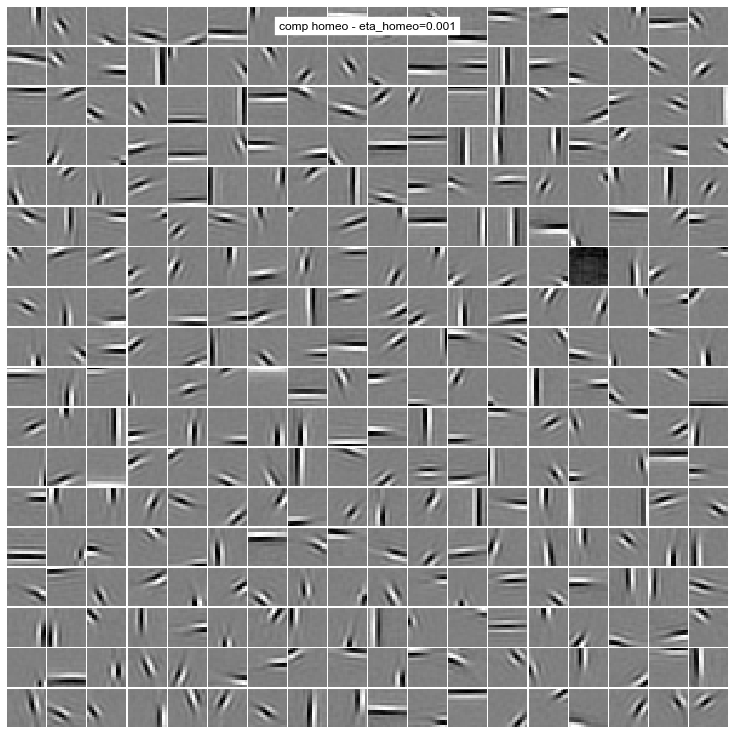

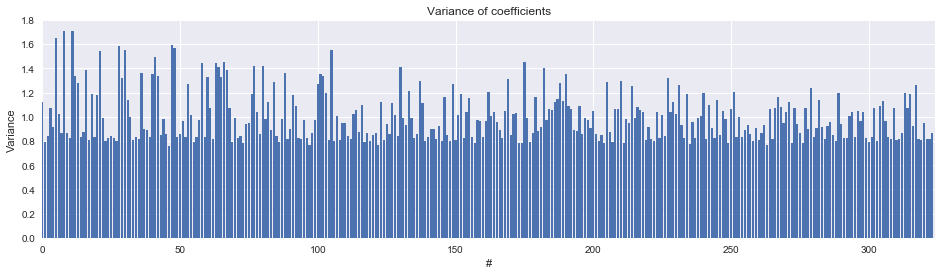

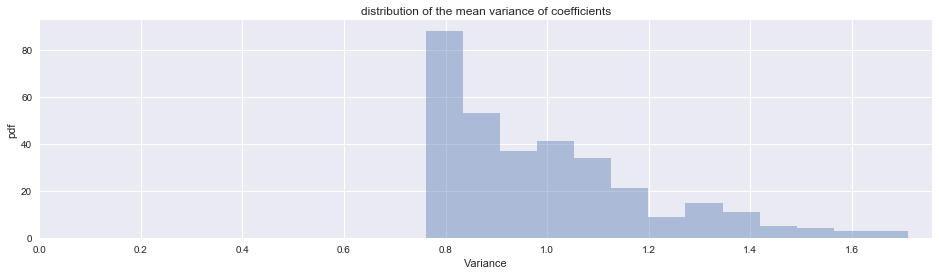

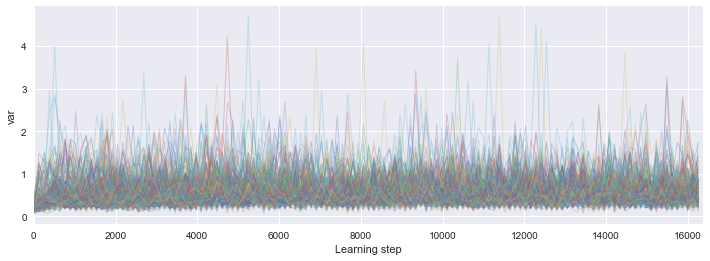

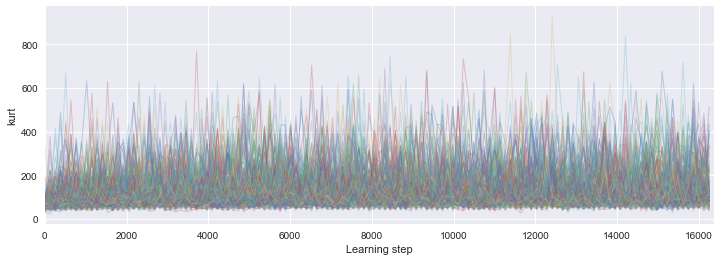

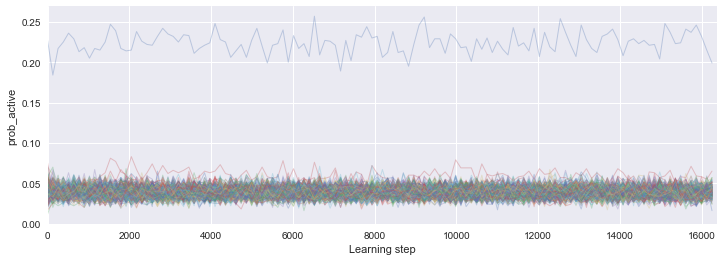

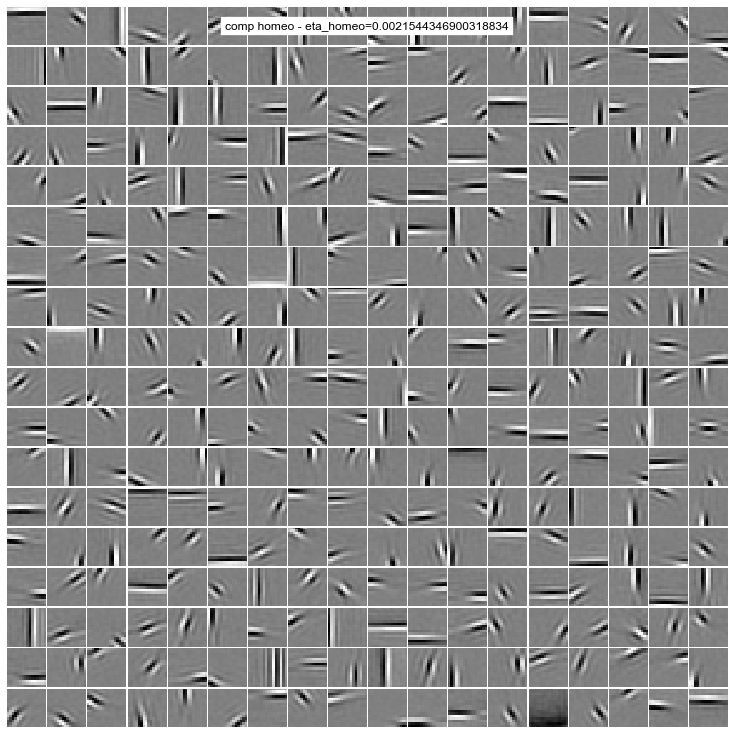

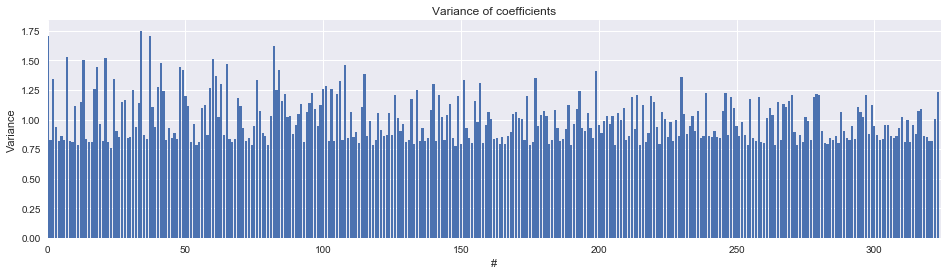

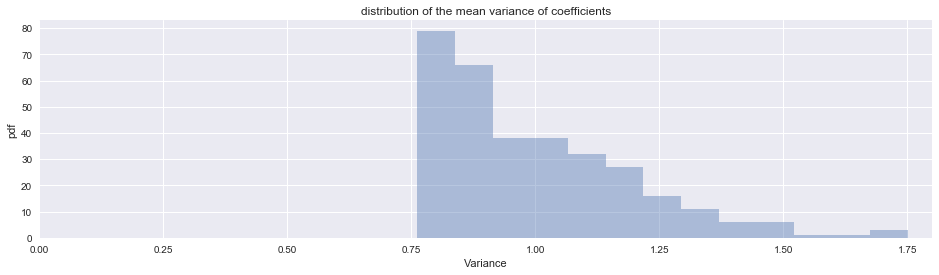

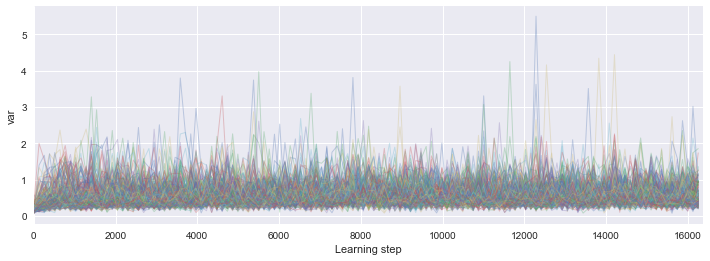

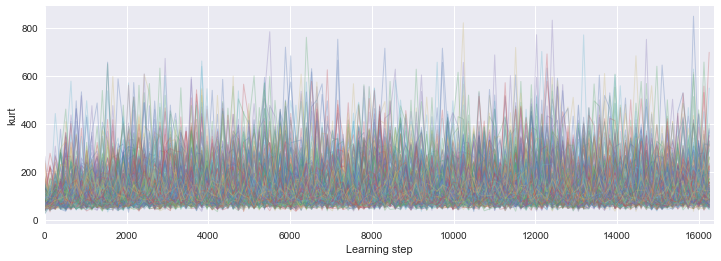

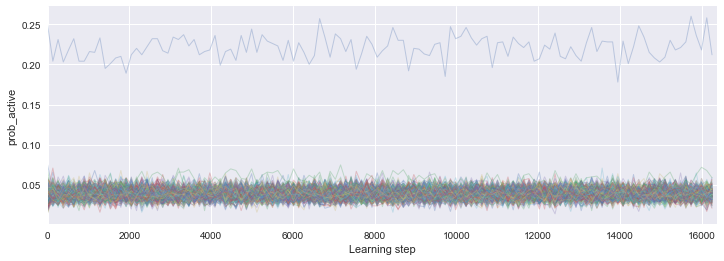

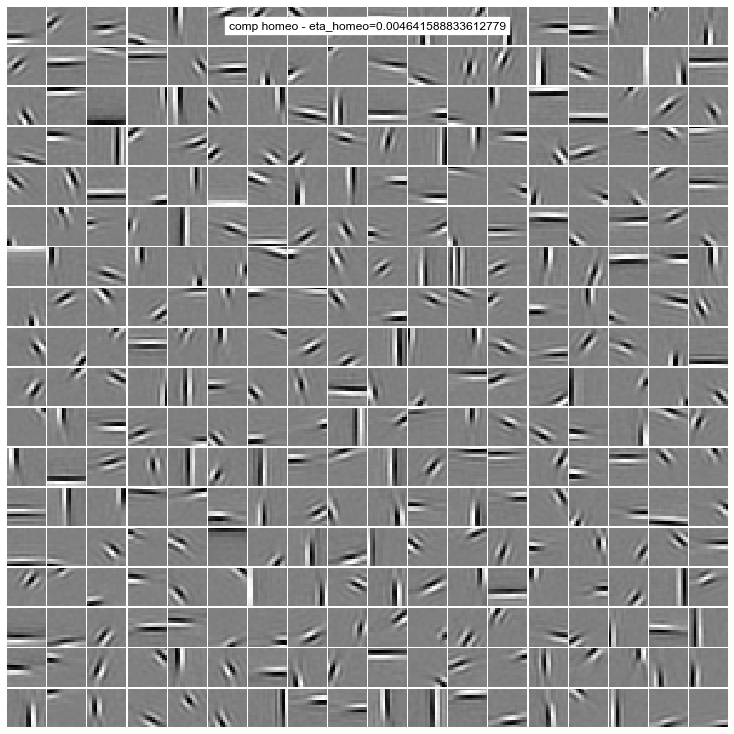

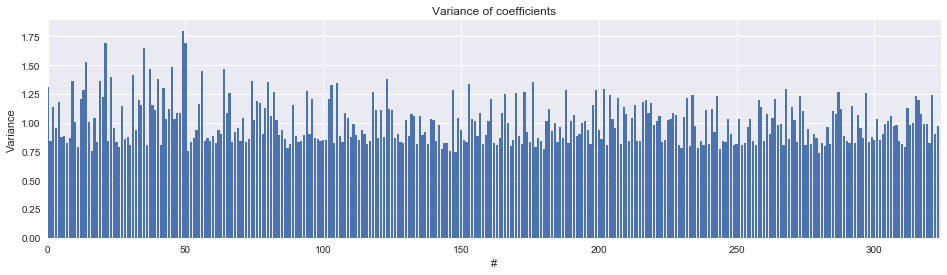

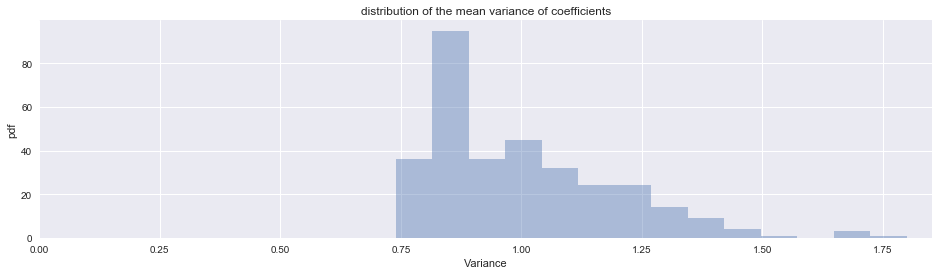

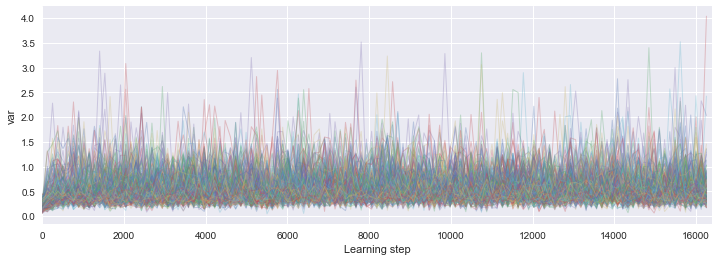

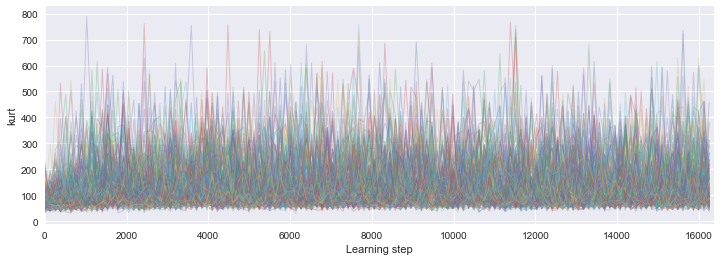

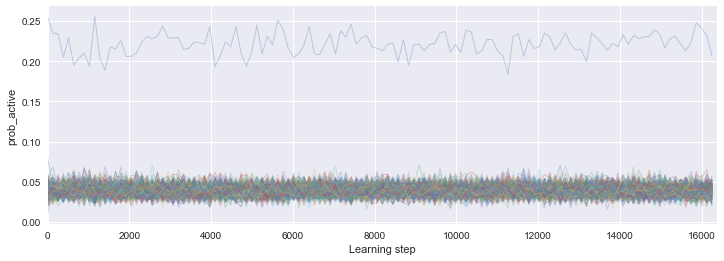

In [6]:
shl = SHL()
data = shl.get_data()
for eta_homeo in np.logspace(-1, 1, N_scan, base=10)*shl.eta_homeo:
    matname = exp + 'homeo - eta_homeo={}'.format(eta_homeo)
    shl = SHL(DEBUG_DOWNSCALE=DEBUG_DOWNSCALE, eta_homeo=eta_homeo, verbose=verbose)
    dico = shl.learn_dico(data=data, matname=matname, list_figures=list_figures)    

## 4. with different l0_sparseness parameters 


In [ ]:
N_scan = int(15/(DEBUG_DOWNSCALE)**.3)
for l0_sparseness in 2**np.arange(8):
    matname = exp + 'l0_sparseness={}'.format(l0_sparseness)
    shl = SHL(DEBUG_DOWNSCALE=DEBUG_DOWNSCALE, l0_sparseness=l0_sparseness, verbose=verbose)
    dico = shl.learn_dico(data=data, matname=matname, list_figures=list_figures)    

## Version used

In [ ]:
import version_information
%version_information numpy, shl_scripts